# Credit Card Detection

Neste projeto iremos realizar detecção de fraudes em cartões de crédito. Os dados podem ser obtidos no dataset do kaggle: [Credit Card Fraud](https://www.kaggle.com/mlg-ulb/creditcardfraud)

# Importando dados e bibliotecas

## Importando principais bibliotecas e os dados

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
# Importando dados
dataset = pd.read_csv('creditcard.csv')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Balanceando os dados e amostragem estratificada

Aqui realizamos uma amostragem estratificada através do método SMOTE e em seguida balanceamos as classes.

A divisão de treino, teste e validação foi de 60%, 20% e 20%, respectivamente.

Realizaremos a reamostragem somente da classe minoritária e além disso a amostragem dos dados de treino e validação serão treinados separadamente nos objetos ``sm_train`` e ``sm_val`` derivados da classe ``SMOTE`` do pacote ``imblearn.over_sampling``.

In [3]:
from imblearn.over_sampling import SMOTE




# Armazenando em numpy array's os dados
X = dataset.values[:,:-1]
y = dataset.values[:,-1:]



# Número de exemplos
n_examples = len(y)


# Separando os dados de não-fraude e os de fraude
# nf significa não-fraude
X_nf = X[y.reshape(-1) == 0,:]
y_nf = y[y.ravel() == 0]
n_examples_nf = len(y_nf)

# Embaralhando os dados
np.random.seed(43)
index_shuffling_nf = list(range(n_examples_nf))
np.random.shuffle(index_shuffling_nf)
np.random.seed(None)

X_nf,y_nf = X_nf[index_shuffling_nf,:],y_nf[index_shuffling_nf,:]


# Definindo os tamanhos dos dados de treino, teste e validação para não-fraude
# A divisão ficará 60%-20%-20%
train_size_nf = int(n_examples_nf*0.6)
val_size_nf = int(n_examples_nf*0.2)
test_size_nf = n_examples_nf - train_size_nf - val_size_nf


# Separando em dados de treino-teste-validação
X_nf_train,y_nf_train = X_nf[:train_size_nf],y_nf[:train_size_nf]
X_nf_val,y_nf_val = X_nf[train_size_nf:train_size_nf+val_size_nf],y_nf[train_size_nf:train_size_nf+val_size_nf]
X_nf_test,y_nf_test = X_nf[train_size_nf+val_size_nf:],y_nf[train_size_nf+val_size_nf:]




# Separando os dados de não-fraude e os de fraude
# f significa fraude
X_f = X[y.reshape(-1) == 1,:]
y_f = y[y.ravel() == 1]
n_examples_f = len(y_f)


# Embaralhando os dados
np.random.seed(42)
index_shuffling_f = list(range(n_examples_f))
np.random.shuffle(index_shuffling_f)
np.random.seed(None)

X_f,y_f = X_f[index_shuffling_f,:],y_f[index_shuffling_f,:]


# Definindo os tamanhos dos dados de treino, teste e validação para fraude
# A divisão ficará 60%-20%-20%
train_size_f = int(n_examples_f*0.6)
val_size_f = int(n_examples_f*0.2)
test_size_f = n_examples_f - train_size_f - val_size_f


# Separando em dados de treino-teste-validação
X_f_train,y_f_train = X_f[:train_size_f],y_f[:train_size_f]
X_f_val,y_f_val = X_f[train_size_f:train_size_f+val_size_f],y_f[train_size_f:train_size_f+val_size_f]
X_f_test,y_f_test = X_f[train_size_f+val_size_f:],y_f[train_size_f+val_size_f:]




# Concatenando os dados rebalanceados

X_train = np.concatenate((X_f_train,X_nf_train),axis=0)
y_train = np.concatenate((y_f_train,y_nf_train),axis=0)


X_val = np.concatenate((X_f_val,X_nf_val),axis=0)
y_val = np.concatenate((y_f_val,y_nf_val),axis=0)


X_test = np.concatenate((X_nf_test,X_f_test),axis=0)
y_test = np.concatenate((y_nf_test,y_f_test),axis=0)




# Rebalanceando os dados de treino e validação
sm_train = SMOTE(sampling_strategy='minority',random_state=42)
sm_val = SMOTE(sampling_strategy='minority',random_state=42)

X_train,y_train = sm_train.fit_resample(X_train,y_train)
X_val,y_val = sm_val.fit_resample(X_val,y_val)

y_train = np.expand_dims(y_train,1)
y_val = np.expand_dims(y_val,1)

# Definindo os tamanhos de treino, teste e validação novamente
train_size = len(y_train)
val_size = len(y_val)
test_size = len(y_test)
n_examples = train_size + val_size + test_size 

# Embaralhando novamente os dados de treino e validação
np.random.seed(101)
index_shuffling_train = list(range(train_size))
np.random.shuffle(index_shuffling_train)
np.random.seed(None)

X_train,y_train = X_train[index_shuffling_train],y_train[index_shuffling_train]


np.random.seed(101)
index_shuffling_val = list(range(val_size))
np.random.shuffle(index_shuffling_val)
np.random.seed(None)

X_val,y_val = X_val[index_shuffling_val],y_val[index_shuffling_val]


In [4]:
from sklearn.preprocessing import MinMaxScaler


sc_X = MinMaxScaler()

X_train_sc = sc_X.fit_transform(X_train)
X_val_sc = sc_X.transform(X_val)
X_test_sc = sc_X.transform(X_test)
X_nf_train_sc = sc_X.transform(X_nf_train)
X_nf_val_sc = sc_X.transform(X_nf_val)
X_nf_test_sc = sc_X.transform(X_nf_test)

In [5]:
import torch
import torch.nn as nn




device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

print(device)

trainX,valX,testX = torch.tensor(X_nf_train_sc),torch.tensor(X_nf_val_sc),torch.tensor(X_nf_test_sc)
trainX,valX,testX = trainX,valX,testX
trainX,valX,testX = trainX.type(torch.float),valX.type(torch.float),testX.type(torch.float)



trainX,valX,testX = trainX.to(device),valX.to(device),testX.to(device)

cpu


In [6]:
n_features = X_train_sc.shape[1]




class Encoder(nn.Module):
    def __init__(self,num_channels_encode,num_channels_out_decode,n_features):
        super(Encoder, self).__init__()
        self.num_channels_encode = num_channels_encode
        self.num_channels_out_decode = num_channels_out_decode
        

        self.n_features = n_features
        

        
        
        self.layer1 =  nn.Sequential(nn.Linear(n_features,self.num_channels_encode[0]),
                        nn.BatchNorm1d(self.num_channels_encode[0]),
                        nn.GELU())

        self.layer2 =  nn.Sequential(nn.Linear(self.num_channels_encode[0],self.num_channels_encode[1]),
                        nn.BatchNorm1d(self.num_channels_encode[1]),
                        nn.GELU(),
                        nn.Dropout(0.2))

        self.layer3 =  nn.Sequential(nn.Linear(self.num_channels_encode[1],self.num_channels_encode[2]),
                        nn.BatchNorm1d(self.num_channels_encode[2]),
                        nn.GELU(),
                        nn.Dropout(0.2))

        self.fc = nn.Linear(self.num_channels_encode[2],self.num_channels_encode[2])


    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.fc(out)
        return out



class Decoder(nn.Module):
    def __init__(self,num_channels_encode,num_channels_out_decode,n_features):
        super(Decoder, self).__init__()
        self.num_channels_encode = num_channels_encode
        self.num_channels_out_decode = num_channels_out_decode
        

        self.n_features = n_features
        

        self.layer4 =  nn.Sequential(nn.Linear(self.num_channels_encode[2],self.num_channels_out_decode[0]),
                        nn.BatchNorm1d(self.num_channels_out_decode[0]),
                        nn.GELU(),
                        nn.Dropout(0.2))

        self.layer5 =  nn.Sequential(nn.Linear(self.num_channels_out_decode[0],self.num_channels_out_decode[1]),
                        nn.BatchNorm1d(self.num_channels_out_decode[1]),
                        nn.GELU(),
                        nn.Dropout(0.2))
        

        self.layer6 =  nn.Sequential(nn.Linear(self.num_channels_out_decode[1],self.num_channels_out_decode[2]),
                        nn.BatchNorm1d(self.num_channels_out_decode[2]),
                        nn.GELU(),
                        nn.Dropout(0.2))


        self.fc = nn.Linear(self.num_channels_out_decode[2],self.num_channels_out_decode[2])

    def forward(self, x):
        out = self.layer4(x)
        out = self.layer5(out)
        out = self.layer6(out)
        out = self.fc(out)
        return out




class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.num_channels_encode = [70,35,15]
        self.num_channels_out_decode = [35,70,n_features]

        self.n_features = n_features

        self.Encoder = Encoder(self.num_channels_encode,self.num_channels_out_decode,self.n_features)
        self.Decoder = Decoder(self.num_channels_encode,self.num_channels_out_decode,self.n_features)
    


    def forward(self, x):
        out = self.Encoder(x)
        out = self.Decoder(out)
        return out


In [7]:
def train_one_batch(model,optimizer,data,target,loss_f):
    model.train()
    # Aplicando backpropagation
    optimizer.zero_grad()
    outputs = model(data)
    loss = loss_f(outputs, target)
    loss.backward()
    optimizer.step()
    return loss

def validate_one_epoch(model,loss_f,val_loader):
    # Val loss
    model.eval()
    list_val_loss = []
    for val_data,val_target in val_loader:
        with torch.no_grad():
            outputs_val = model(val_data)
            loss = loss_f(outputs_val, val_target)
        list_val_loss.append(loss.detach().item())
    mean_loss = np.mean(list_val_loss)
    return mean_loss

In [8]:
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from time import time
from datetime import timedelta
from tqdm import tqdm

class Datasets(Dataset):
  'Characterizes a dataset for PyTorch'
  def __init__(self, X, y):
        'Initialization'
        self.labels = y
        self.data = X

  def __len__(self):
        'Denotes the total number of samples'
        return len(self.labels)

  def __getitem__(self, index):
        'Generates one sample of data'
        # Select sample
        X = self.data[index]
        y = self.labels[index]
        return X, y

def train(model, optimizer, loss_f, num_epochs, batch_size, data_train_x, data_train_y, seed = None, validation=False, patience=5, data_val_x=None, data_val_y=None):
  '''
    train é uma função utilizada no treinamento de redes neurais

    
    model: o modelo de rede neural utilizada

    optimizer: o otimizador utilizado

    loss_f: a função "loss" utilizada para treinar o modelo

    num_epochs: número de épocas utilizadas no treinamento

    batch_size: tamanho do batch utilizado

    data_train_x: variável de entrada dos dados de treino

    data_train_y: variável de saída dos dados de treino

    seed: fixa a seed inicial. Por padrão irá ser ignorada.
    
    validation: verifica se irá separar parte do conjunto para validação. 
    Se True então separa 80% do conjunto para validação. Caso False não haverá validação.
    patience: patience do EarlyStopping, caso haja validação.
  '''
  
  # Inicializa seed
  gen = torch.Generator()
  if seed:
    np.random.seed(seed)
    random.seed(seed)
    gen.manual_seed(seed)
  
  # Realiza um embaralhamento nos índices
  m = len(data_train_y)
  idx = np.arange(0,m,dtype=int)
  np.random.shuffle(idx)

  

  # Separa a validação se não houver dados de validação e validation==False
  train_size = m
  if validation:
    if data_val_x == None:
      train_size = int(0.8*m)
      val_size = m - train_size
      val_idx = idx[train_size:]
      data_val_x = data_train_x[val_idx]
      data_val_y = data_train_y[val_idx]
      idx = idx[:train_size]
    else:
      val_size = len(data_val_y)
    val_dataset = Datasets(data_val_x,data_val_y)
    val_loader = DataLoader(val_dataset,batch_size=min([val_size,batch_size]))

  
  train_dataset = Datasets(data_train_x[idx],data_train_y[idx])
  train_loader = DataLoader(train_dataset,batch_size=batch_size,shuffle=True,generator=gen)

  # Inicia valores da sequência
  val_loss = []
  train_loss = []

  num_batches = train_size//batch_size + 1 if train_size%batch_size>0 else train_size//batch_size
  
  # Inicia os valores de validação val_loss
  if validation:
    # Val loss
    mean_loss = validate_one_epoch(model,loss_f,val_loader)
    val_loss.append(mean_loss.item())
    # parâmetro Exponential Smoothing
    alp = 0.90
    # parâmetro EarlyStopping
    val_min = val_loss[-1]
  
  # Não utilizado se validation==False
  early_stopping = 0

  batch = 0
  
  # Tempo
  initial_time = time()

  # loops épocas e batches
  for epoch in range(num_epochs):
    for data,target in train_loader:
      loss = train_one_batch(model,optimizer,data,target,loss_f)
      train_loss.append(loss.detach().item())

      # Avaliando dados de validação
      if validation:
        # Val loss
        mean_loss = validate_one_epoch(model,loss_f,val_loader)
        val_loss.append(alp*val_loss[-1]+(1-alp)*mean_loss.item())
      
      # Espera pelo menos uma época para iniciar o EarlyStopping
      if (batch>min([num_batches,250])) and validation:
        # Early Stopping 
        if val_loss[-1]>val_min:
          early_stopping += 1
          if early_stopping>=patience:
            break
        else:
          val_min = val_loss[-1]
          early_stopping = 0
      
      batch += 1

      if validation and (batch%100 == 1):
        final_time = time()
        elapsed_time = (final_time - initial_time)
        avg_time = elapsed_time/batch
        delta_time = str(timedelta(seconds=int(elapsed_time)))
        # Formatando string a cada período
        stats_string = "Num. Batches: {batch:d}/{num_batches:d},\t Time Elapsed: {time:s},\t Avg. Time per Batch: {avg_time:1.4f}s,\t Min. Val. Loss: {val_min:1.4f},\t Current Val. Loss: {val_loss:1.4f}"
        print(stats_string.format(batch=batch,num_batches=num_batches*num_epochs,time=delta_time,avg_time=avg_time,val_min=val_min,val_loss=val_loss[-1]))
    
    # Early Stopping epochs loop
    if (validation and early_stopping>=patience):
      break
  
  return [val_loss,train_loss]

In [9]:
import random
from tqdm import tqdm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

device = 'cpu'
loss_function = torch.nn.MSELoss()








# Fixando seed para ter reprodutibilidade
seed = 1116567215
np.random.seed(seed)
random.seed(seed)
torch.manual_seed(seed)
# Realizando uma escolha dos parâmetros
learning_rate = 1e-2
weight_decay = 1e-5
model_autoencoder = Autoencoder()
num_epochs = 5
batch_size = 256
patience = 20


optimizer = torch.optim.Adam(model_autoencoder.parameters(), lr=learning_rate,weight_decay=weight_decay)


[val_loss,train_loss] = train(model=model_autoencoder, optimizer=optimizer, loss_f=loss_function, num_epochs=num_epochs, batch_size=batch_size, data_train_x=trainX, data_train_y=trainX, validation=True, patience=patience, data_val_x=valX, data_val_y=valX, seed=seed)


# Guardando parâmetros selecionados
params = {'device':device, 'learning_rate':learning_rate,
            'num_epochs':num_epochs,'batch_size':batch_size,
            'weight_decay':weight_decay}




# Guardando performances
testX_pred = model_autoencoder(testX)
valX_pred = model_autoencoder(valX)

testX_pred = testX_pred.data.numpy()
valX_pred = valX_pred.data.numpy()





Results = {'RMSE val.':np.sqrt(mean_squared_error(valX.reshape(-1),valX_pred.reshape(-1))),
                    'RMSE':np.sqrt(mean_squared_error(testX.reshape(-1),testX_pred.reshape(-1))),
                    'MAE':mean_absolute_error(testX.reshape(-1),testX_pred.reshape(-1))}




display(Results)
display(params)

Num. Batches: 1/3335,	 Time Elapsed: 0:00:00,	 Avg. Time per Batch: 0.9382s,	 Min. Val. Loss: 0.3292,	 Current Val. Loss: 0.3280
Num. Batches: 101/3335,	 Time Elapsed: 0:01:37,	 Avg. Time per Batch: 0.9617s,	 Min. Val. Loss: 0.3292,	 Current Val. Loss: 0.0033
Num. Batches: 201/3335,	 Time Elapsed: 0:03:03,	 Avg. Time per Batch: 0.9146s,	 Min. Val. Loss: 0.3292,	 Current Val. Loss: 0.0029


{'RMSE val.': 0.04865907, 'RMSE': 0.04846236, 'MAE': 0.031199839}

{'device': 'cpu',
 'learning_rate': 0.01,
 'num_epochs': 5,
 'batch_size': 256,
 'weight_decay': 1e-05}

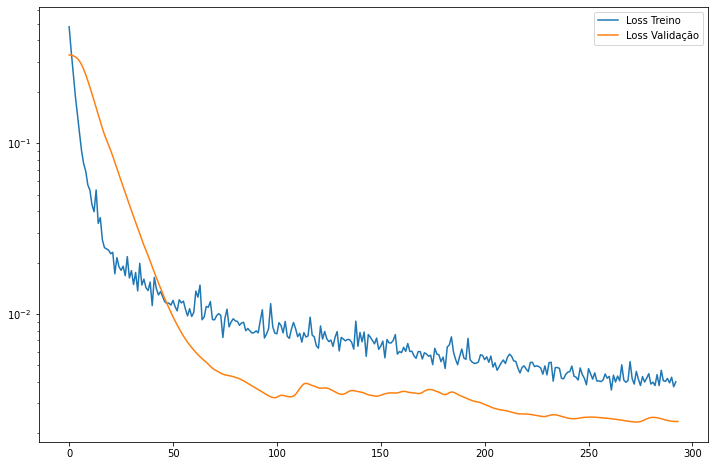

In [10]:
plt.figure(figsize=(12,8))
plt.plot(train_loss,label='Loss Treino')
plt.plot(val_loss,label='Loss Validação')
plt.yscale('log')
plt.legend()
plt.show()

Vemos que os dados de validação tem um desempenho melhor. Isso provavelmente se deve à diferença entre o comportamento do estado ``model.eval()``, que desliga o Dropout no nosso modelo, e o estado ``model.train()`` que tem o funcionamento dado na criação do modelo.

In [11]:
PATH = 'autoencoder.ptc'
final_model = model_autoencoder.to('cpu')
torch.save(final_model.state_dict(), PATH)
model_autoencoder = model_autoencoder.to(device)

In [12]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

print(device)

trainX,valX,testX = torch.tensor(X_train_sc),torch.tensor(X_val_sc),torch.tensor(X_test_sc)
trainX,valX,testX = trainX,valX,testX
trainX,valX,testX = trainX.type(torch.float),valX.type(torch.float),testX.type(torch.float)


trainY,valY,testY = torch.tensor(y_train).squeeze(1),torch.tensor(y_val).squeeze(1),torch.tensor(y_test).squeeze(1)
trainY,valY,testY = trainY.type(torch.LongTensor),valY.type(torch.LongTensor),testY.type(torch.LongTensor)


trainX,valX,testX = trainX.to(device),valX.to(device),testX.to(device)
trainY,valY,testY = trainY.to(device),valY.to(device),testY.to(device)

cpu


In [13]:
model_autoencoder.eval()
trainX_autoencoder = model_autoencoder.Encoder(trainX)

testX_autoencoder = model_autoencoder.Encoder(testX)


valX_autoencoder = model_autoencoder.Encoder(valX)
print(valX_autoencoder)
X_val_sc_pred = valX_autoencoder.cpu().data.numpy()


trainX_autoencoder,testX_autoencoder,valX_autoencoder = trainX_autoencoder.to(device),testX_autoencoder.to(device),valX_autoencoder.to(device)

tensor([[-0.2924,  0.4758, -0.0376,  ..., -0.4715,  0.3474, -0.0634],
        [-0.2160,  0.3107, -0.4783,  ..., -0.0349,  0.1608,  0.0974],
        [-0.4951,  0.2692, -0.2490,  ..., -0.1087,  0.4786, -0.2795],
        ...,
        [-0.1965, -0.2386, -0.2330,  ...,  0.3241, -0.3400, -0.0785],
        [-0.3335,  0.1613, -0.4026,  ...,  0.0092,  0.4367, -0.0517],
        [-0.1426, -0.2537, -0.2620,  ...,  0.3183, -0.2708, -0.1005]],
       grad_fn=<AddmmBackward0>)


In [14]:
trainX_autoencoder = trainX_autoencoder.detach()
valX_autoencoder = valX_autoencoder.detach()
testX_autoencoder = testX_autoencoder.detach()

In [15]:
from tqdm import tqdm


n_features = trainX_autoencoder.shape[1]



class Classification_NN(nn.Module):
    def __init__(self,n_features,num_hidden_layers,num_neurons):
        super(Classification_NN, self).__init__()

        self.input_sizes = []

        for i in range(num_hidden_layers):
          self.input_sizes.append(   int(2*num_neurons*(1-abs(i-((num_hidden_layers-1)/2))/num_hidden_layers))   )

        self.output_sizes = self.input_sizes[1:]
        self.output_sizes.append(2)

        self.n_features = n_features

        self.num_hidden_layers = num_hidden_layers

        self.layer0 = nn.Sequential(nn.Linear(n_features,self.input_sizes[0]),
                        nn.BatchNorm1d(self.input_sizes[0]),
                        nn.GELU(),
                        nn.Dropout(0.25))

        self.layers = nn.ModuleList([])
        for i in range(num_hidden_layers):
          self.layers.append(nn.Sequential(nn.Linear(self.input_sizes[i],self.output_sizes[i]),
                        nn.BatchNorm1d(self.output_sizes[i]),
                        nn.GELU(),
                        nn.Dropout(0.25)))
        

        self.fc = nn.Linear(2, 2)


    def forward(self, x):
        out = self.layer0(x)
        for layer in self.layers:
          out = layer(out)
        out = self.fc(out)
        return out

In [16]:
# Fixando seed para ter reprodutibilidade
seed = 1116567215
np.random.seed(seed)
random.seed(seed)
torch.manual_seed(seed)


# Realizando uma escolha dos parâmetros
learning_rate = 1e-2
weight_decay = 1e-5
num_epochs = 5
batch_size = 256
patience = 10

# max_hidden_layers = 4
# n_iter = 10

hyperparams = {}
validation_loss = []

num_hidden_layers = 2
num_neurons = 1.5*n_features

model_classifier = Classification_NN(n_features,num_hidden_layers,num_neurons)


loss_function = torch.nn.CrossEntropyLoss()


optimizer = torch.optim.Adam(model_classifier.parameters(), lr=learning_rate,weight_decay=weight_decay)


[val_loss,train_loss] = train(model=model_classifier, optimizer=optimizer, loss_f=loss_function, num_epochs=num_epochs, batch_size=batch_size, data_train_x=trainX_autoencoder, data_train_y=trainY, validation=True, patience=patience, data_val_x=valX_autoencoder, data_val_y=valY, seed=seed)

hyperparams.update({"Hidden Layers":num_hidden_layers,
                    "Num. Neurons":num_neurons})
validation_loss.append(val_loss[-1])

Num. Batches: 1/6665,	 Time Elapsed: 0:00:01,	 Avg. Time per Batch: 1.4066s,	 Min. Val. Loss: 0.8462,	 Current Val. Loss: 0.8456
Num. Batches: 101/6665,	 Time Elapsed: 0:02:04,	 Avg. Time per Batch: 1.2326s,	 Min. Val. Loss: 0.8462,	 Current Val. Loss: 0.3952
Num. Batches: 201/6665,	 Time Elapsed: 0:04:15,	 Avg. Time per Batch: 1.2693s,	 Min. Val. Loss: 0.8462,	 Current Val. Loss: 0.3675


In [17]:
val_prob = model_classifier(valX_autoencoder)
val_prob = torch.softmax(val_prob,dim=1)
val_prob = val_prob[:,1]
val_prob = val_prob.detach().data.numpy()




test_prob = model_classifier(testX_autoencoder)
test_prob = torch.softmax(test_prob,dim=1)
test_prob = test_prob[:,1]
test_prob = test_prob.detach().data.numpy()

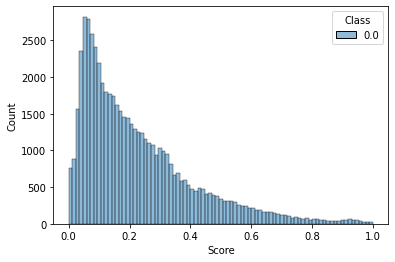

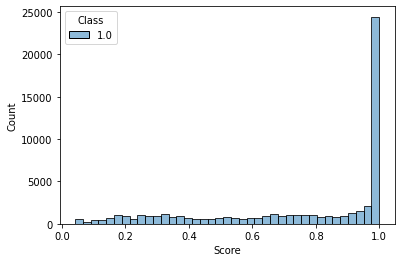

In [18]:
# Score (Não-Fraude)
val_prob_nf = val_prob[y_val.ravel()==0]
data_nf = np.concatenate((val_prob_nf,np.zeros_like(val_prob_nf)))
data_nf = data_nf.reshape((-1,2),order="F")


# Score (Fraude)
val_prob_f = val_prob[y_val.ravel()==1]
data_f = np.concatenate((val_prob_f,np.ones_like(val_prob_f)))
data_f = data_f.reshape((-1,2),order="F")


# Concatenando dados em um dataframe
data = pd.DataFrame(np.concatenate([data_nf,data_f]),columns=["Score","Class"])

# Plotando Scores por classe
sns.histplot(data=data[data["Class"] == 0], x="Score", hue="Class")
plt.show()

sns.histplot(data=data[data["Class"] == 1], x="Score", hue="Class")
plt.show()

### Testando diferentes limiares (thresholds)

Definindo alguns testes e decidindo o melhor limiar (threshold) para prever as classes.

Referências: 

[A Gentle Introduction to Threshold-Moving for Imbalanced Classification](https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/)

[Optimal Threshold for Imbalanced Classification](https://towardsdatascience.com/optimal-threshold-for-imbalanced-classification-5884e870c293)



#### G-Mean

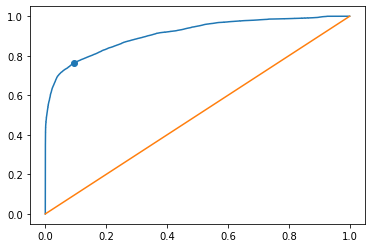

Best Threshold: 0.4955
Area Under the Curve: 0.9099


In [19]:
from sklearn.metrics import roc_curve
from sklearn.metrics import fbeta_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Utilizando a ROC curve para encontrar os fpr (taxa de falsos positivos)
# e os tpr (taxa de verdadeiros positivos)
fpr, tpr, thresholds = roc_curve(y_val,val_prob)
x = [0,1]

# Taxa de verdadeiros negativos = 1-fpr (1-(taxa de falsos positivos))
j_max = np.sqrt(tpr*(1-fpr)).argmax()
threshold = thresholds[j_max]

# Verificando o ponto na curva ROC
plt.plot(fpr,tpr)
plt.plot(x,x)
plt.scatter((fpr[j_max]),tpr[j_max])
plt.show()
print('Best Threshold: %1.4f'%threshold)
print('Area Under the Curve: %1.4f'%(np.diff(fpr)*tpr[1:]).sum())

In [20]:
y_val_pred_gmean = (val_prob>=threshold)


y_test_pred_gmean = (test_prob>=threshold)

**************Dados de Validação**************

F-beta score: 0.7866 	 beta = 2.00


,precision,recall,f1-score,support
0.0,0.793560,0.905316,0.845762,56863.000000
1.0,0.889796,0.764487,0.822395,56863.000000
accuracy,0.834901,0.834901,0.834901,0.834901
macro avg,0.841678,0.834901,0.834079,113726.000000
weighted avg,0.841678,0.834901,0.834079,113726.000000


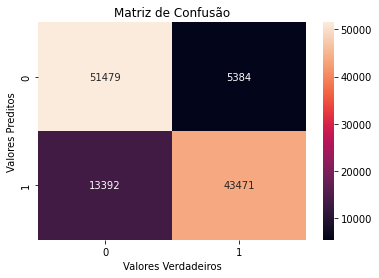

In [21]:
# Utilizando as métricas Fbeta, classification report e confusion matrix para verificar as precisão das previsões
print("**************Dados de Validação**************\n")
beta = 2

print("F-beta score: %1.4f"%fbeta_score(y_val.reshape(-1),y_val_pred_gmean,beta=beta),'\t beta = %1.2f'%beta)

display(pd.DataFrame(classification_report(y_val.reshape(-1),y_val_pred_gmean,digits=2,output_dict=True)).T)

sns.heatmap(confusion_matrix(y_val.reshape(-1),y_val_pred_gmean,labels=[0.,1.]),annot=True,fmt='1.0f')
ax = plt.gca()
ax.set_title('Matriz de Confusão')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')
plt.show()

**************Dados de Teste**************

F-beta score: 0.0618 	 beta = 2.00


,precision,recall,f1-score,support
0.0,0.999495,0.904384,0.949564,56863.000000
1.0,0.013249,0.737374,0.026030,99.000000
accuracy,0.904094,0.904094,0.904094,0.904094
macro avg,0.506372,0.820879,0.487797,56962.000000
weighted avg,0.997781,0.904094,0.947959,56962.000000


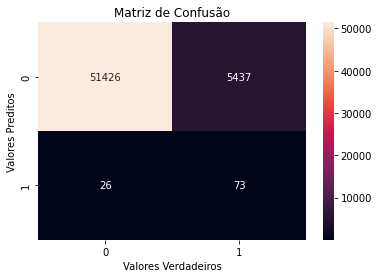

In [22]:
print("**************Dados de Teste**************\n")
beta = 2
print("F-beta score: %1.4f"%fbeta_score(y_test.reshape(-1),y_test_pred_gmean,beta=beta),'\t beta = %1.2f'%beta)

display(pd.DataFrame(classification_report(y_test.reshape(-1),y_test_pred_gmean,digits=2,output_dict=True)).T)

sns.heatmap(confusion_matrix(y_test.reshape(-1),y_test_pred_gmean,labels=[0.,1.]),annot=True,fmt='1.0f')
ax = plt.gca()
ax.set_title('Matriz de Confusão')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')
plt.show()

#### $F_{\beta}$

O método $F_{\beta}$ encontra a limiar maximizando a quantidade $F_{\beta}$.

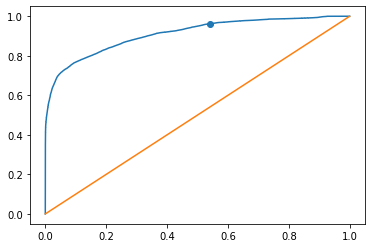

Best Threshold: 0.1560
Area Under the Curve: 0.9099


In [23]:
from sklearn.metrics import recall_score

# Utilizando a ROC curve para encontrar os fpr (taxa de falsos positivos)
# e os tpr (taxa de verdadeiros positivos)
fpr, tpr, thresholds = roc_curve(y_val,val_prob)
x = [0,1]

n_thresholds = 50
np.random.seed(42)
random_thresholds = np.random.rand(n_thresholds)*(val_prob.max() - val_prob.min()) + val_prob.min()
np.random.seed(None)

# Neste caso vamos maximizar o f-beta com beta = 2
beta = 2
fbeta_scores = np.zeros((n_thresholds))
for j in range(n_thresholds):
  y_val_pred = (val_prob>=random_thresholds[j])
  fbeta_scores[j] = fbeta_score(y_val,y_val_pred,beta=beta)


# Encontrando o limiar com maior valor de fbeta
j_max = fbeta_scores.argmax()

threshold = random_thresholds[j_max]


y_val_pred = (val_prob>=threshold)
tpr_max = recall_score(y_val,y_val_pred)
fpr_max = 1 - recall_score(y_val,y_val_pred,pos_label=0)


# Verificando o ponto na curva ROC
plt.plot(fpr,tpr)
plt.plot(x,x)
plt.scatter(fpr_max,tpr_max)
plt.show()
print('Best Threshold: %1.4f'%threshold)
print('Area Under the Curve: %1.4f'%(np.diff(fpr)*tpr[1:]).sum())

In [24]:
y_val_pred_fbeta = (val_prob>=threshold)


y_test_pred_fbeta = (test_prob>=threshold)

**************Dados de Validação**************

F-beta score: 0.8741 	 beta = 2.00


,precision,recall,f1-score,support
0.0,0.923961,0.457943,0.612374,56863.000000
1.0,0.639678,0.962313,0.768507,56863.000000
accuracy,0.710128,0.710128,0.710128,0.710128
macro avg,0.781820,0.710128,0.690441,113726.000000
weighted avg,0.781820,0.710128,0.690441,113726.000000


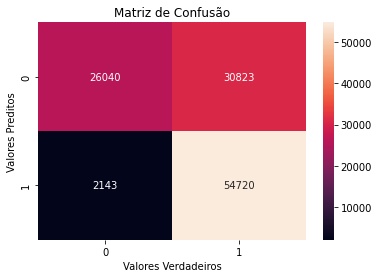

In [25]:
# Realizando as avaliações dos resultados obtidos
print("**************Dados de Validação**************\n")
beta = 2
print("F-beta score: %1.4f"%fbeta_score(y_val.reshape(-1),y_val_pred_fbeta,beta=beta),'\t beta = %1.2f'%beta)

display(pd.DataFrame(classification_report(y_val.reshape(-1),y_val_pred_fbeta,digits=2,output_dict=True)).T)

sns.heatmap(confusion_matrix(y_val.reshape(-1),y_val_pred_fbeta,labels=[0.,1.]),annot=True,fmt='1.0f')
ax = plt.gca()
ax.set_title('Matriz de Confusão')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')
plt.show()

**************Dados de Teste**************

F-beta score: 0.0144 	 beta = 2.00


,precision,recall,f1-score,support
0.0,0.999654,0.457573,0.627788,56863.000000
1.0,0.002909,0.909091,0.005800,99.000000
accuracy,0.458358,0.458358,0.458358,0.458358
macro avg,0.501282,0.683332,0.316794,56962.000000
weighted avg,0.997922,0.458358,0.626707,56962.000000


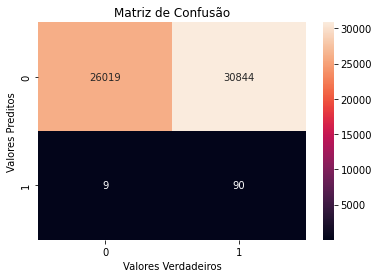

In [26]:
print("**************Dados de Teste**************\n")
beta = 2
print("F-beta score: %1.4f"%fbeta_score(y_test.reshape(-1),y_test_pred_fbeta,beta=beta),'\t beta = %1.2f'%beta)

display(pd.DataFrame(classification_report(y_test.reshape(-1),y_test_pred_fbeta,digits=2,output_dict=True)).T)

sns.heatmap(confusion_matrix(y_test.reshape(-1),y_test_pred_fbeta,labels=[0.,1.]),annot=True,fmt='1.0f')
ax = plt.gca()
ax.set_title('Matriz de Confusão')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')
plt.show()

#### Percentil

Neste método calculamos o a percentil 95 das distâncias até o cluster nos dados de validação que não são fraude e predizemos como fraude os valores que se encontrar acima deste valor.

In [27]:
threshold = np.quantile(val_prob_nf,.95)
print('Threshold: %1.4f'%threshold)

Threshold: 0.6037


In [28]:
# Realizando as previsões para o limiar encontrado
y_val_pred_std = (val_prob>=threshold)


y_test_pred_std = (test_prob>=threshold)

**************Dados de Validação**************

F-beta score: 0.7484 	 beta = 2.00


,precision,recall,f1-score,support
0.0,0.767915,0.949985,0.849302,56863.000000
1.0,0.934441,0.712889,0.808767,56863.000000
accuracy,0.831437,0.831437,0.831437,0.831437
macro avg,0.851178,0.831437,0.829034,113726.000000
weighted avg,0.851178,0.831437,0.829034,113726.000000


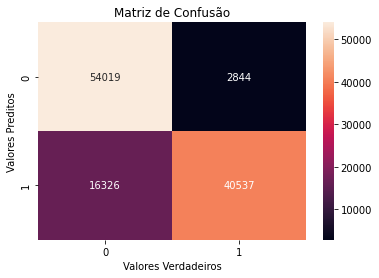

In [29]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Realizando as avaliações dos resultados obtidos
print("**************Dados de Validação**************\n")
beta = 2
print("F-beta score: %1.4f"%fbeta_score(y_val.reshape(-1),y_val_pred_std,beta=beta),'\t beta = %1.2f'%beta)

display(pd.DataFrame(classification_report(y_val.reshape(-1),y_val_pred_std,digits=2,output_dict=True)).T)

sns.heatmap(confusion_matrix(y_val.reshape(-1),y_val_pred_std,labels=[0.,1.]),annot=True,fmt='1.0f')
ax = plt.gca()
ax.set_title('Matriz de Confusão')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')
plt.show()

**************Dados de Teste**************

F-beta score: 0.1136 	 beta = 2.00


,precision,recall,f1-score,support
0.0,0.999502,0.952500,0.975435,56863.000000
1.0,0.025965,0.727273,0.050139,99.000000
accuracy,0.952108,0.952108,0.952108,0.952108
macro avg,0.512733,0.839886,0.512787,56962.000000
weighted avg,0.997810,0.952108,0.973827,56962.000000


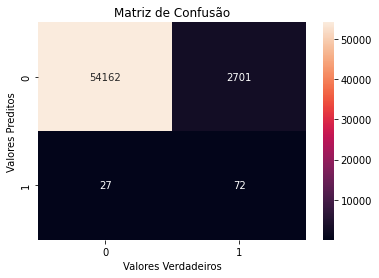

In [30]:
print("**************Dados de Teste**************\n")
beta = 2
print("F-beta score: %1.4f"%fbeta_score(y_test.reshape(-1),y_test_pred_std,beta=beta),'\t beta = %1.2f'%beta)

display(pd.DataFrame(classification_report(y_test.reshape(-1),y_test_pred_std,digits=2,output_dict=True)).T)

sns.heatmap(confusion_matrix(y_test.reshape(-1),y_test_pred_std,labels=[0.,1.]),annot=True,fmt='1.0f')
ax = plt.gca()
ax.set_title('Matriz de Confusão')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')
plt.show()

### Conclusões para Autoencoder

*************************   Dados de Teste   *************************


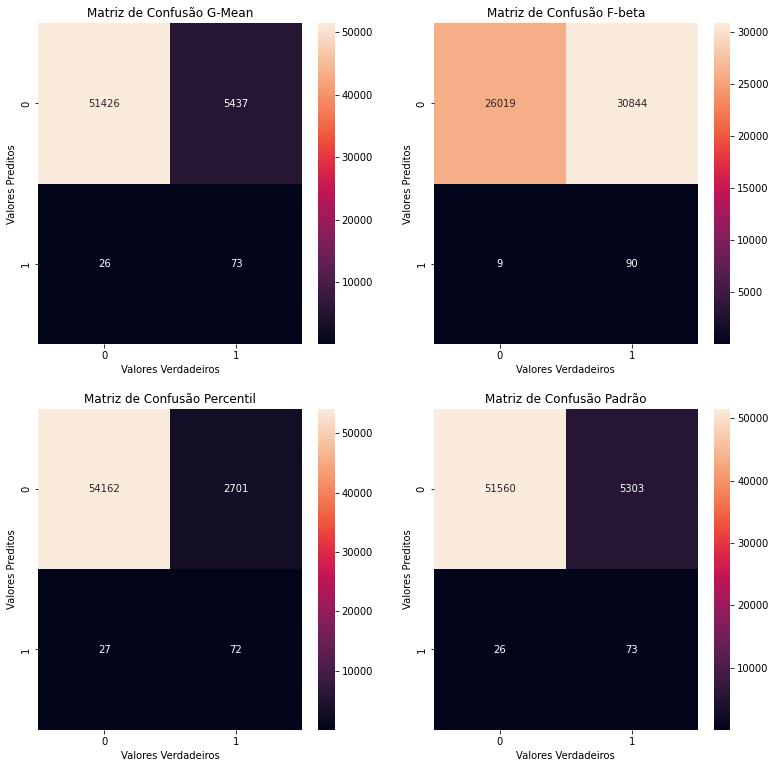

In [31]:
num_asterisk = 25
print("*"*num_asterisk + "   Dados de Teste   " + "*"*num_asterisk)


fig,axes = plt.subplots(2,2)
fig.set_size_inches(6.5*2,6.5*2)

axes = axes.ravel()

# G-mean
ax = axes[0]
sns.heatmap(confusion_matrix(y_test.reshape(-1),y_test_pred_gmean,labels=[0.,1.]),annot=True,fmt='d',ax=ax)
ax.set_title('Matriz de Confusão G-Mean')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')




# F-beta
ax = axes[1]
sns.heatmap(confusion_matrix(y_test.reshape(-1),y_test_pred_fbeta,labels=[0.,1.]),annot=True,fmt='d',ax=ax)
ax.set_title('Matriz de Confusão F-beta')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')



# Percentil
ax = axes[2]
sns.heatmap(confusion_matrix(y_test.reshape(-1),y_test_pred_std,labels=[0.,1.]),annot=True,fmt='d',ax=ax)
ax.set_title('Matriz de Confusão Percentil')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')


y_test_pred = (test_prob>=0.5).astype(float)

# Percentil
ax = axes[3]
sns.heatmap(confusion_matrix(y_test.reshape(-1),y_test_pred,labels=[0.,1.]),annot=True,fmt='d',ax=ax)
ax.set_title('Matriz de Confusão Padrão')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')

plt.show()